In [1]:
#importing all the necessary libraries required for the algorithm
import numpy as np
import math
import copy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the data's given
df = pd.read_csv('classification_train.csv')
arr = df.to_numpy()
x_values = arr[:,2:786]
y_values = arr[:,1]
#for finding number of training examples and number of features
m = len(x_values)
n = len(df.columns)-2

#to view the csv file
df.head()
print(x_values.shape)

(30000, 784)


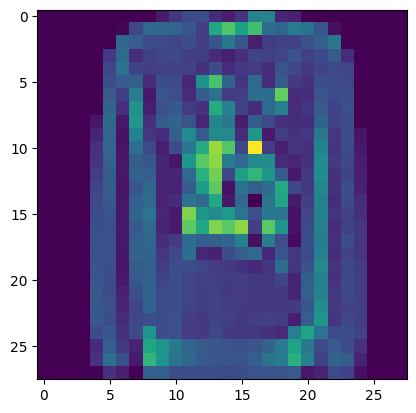

In [3]:
plt.imshow(x_values[2998].reshape(28,28))

In [4]:
num_unique = np.unique(y_values)
print((num_unique))
y_classes = np.zeros((m,len(num_unique)))
for j in range(len(num_unique)):
    for i in range(m):
        if y_values[i] == num_unique[j]:
            y_classes[i,j] = 1
y_classes = y_classes.T
print(y_classes.shape)

[0 1 2 3 4 5 6 7 8 9]
(10, 30000)


In [5]:
#to assign initial values to w and b
w_init = np.zeros((len(num_unique),n ))
b_init = np.zeros((len(num_unique),1))
print(w_init.shape)

(10, 784)


In [6]:
#sigmod function
def sigmoid(z):
    answer_func = 1/(1+np.exp(-1*(z)))
    return answer_func

In [7]:
#to creat function
def main_func(x_values,w,b):
    func = np.zeros((m))
    for i in range(m):
        func[i] = sigmoid(np.dot(x_values[i],w)+b)
    return func

In [ ]:
#to creat function
def main_func(x_values,w,b):
    func = np.zeros((m))
    func[i] = sigmoid(np.matmul(x_values,w)+b)
    return func

In [8]:
#to find mean
def mean(x_values,m,n):
    mean = np.zeros(n,)
    for j in range(n):
        summation = 0
        for i in range(m):
            summation += x_values[i,j]
        mean[j] = summation/m
    return mean

In [9]:
#to find standard deviation
def std_deviation(x_values,mean,m,n):
    summation = np.zeros(n,)
    standard_deviation = np.zeros(n,)
    for j in range(n):
        for i in range(m):
            summation[j] += ((x_values[i,j]-mean[j])**2)
        summation[j] = (summation[j]/m)
        standard_deviation[j] = math.sqrt(summation[j])
    return standard_deviation

In [10]:
#implementing the z score normalization
def z_score(x_values,m,n):
    avg = mean(x_values,m,n)
    standard_deviation = std_deviation(x_values,avg,m,n)
    x_modified = np.zeros_like(x_values)
    for j in range(n):
        for i in range(m):
            x_modified[i,j]= ((x_values[i,j]-avg[j])/standard_deviation[j])
    return x_modified

In [11]:
#to find the loss
def cost_func(x_values,y_values,m,w,b):
    y_predicted = main_func(x_values,w,b)
    loss = (-1/m)*np.sum(y_values*np.log(y_predicted) + (1-y_values)*np.log(1-y_predicted))
    return loss

In [12]:
#finding the derivative of w and b 
def derivative(x_values,y_values,m,n,w,b):
    y_predicted = main_func(x_values,w,b)
    loss = y_values-y_predicted
    derivative_w = np.zeros(n)
    derivative_b = 0
    for i in range(n):
        derivative_w[i] = (1/m)*np.sum((loss)*x_values[:,i])
    derivative_b = (1/m)*np.sum(loss)
    
    return derivative_w,derivative_b

In [ ]:
print(cost_func(x_values,y_classes[0],m,w_init[0],b_init[0]))

In [ ]:
#x_modified = z_score(x_values,m,n)
#print(derivative(x_modified,y_classes[0],m,n,w_init[0],b_init[0]))

In [37]:
def gradiant_decent(x_values,y_values,m,n,w,b,alpha,num_iterations):
    w_temp = copy.deepcopy(w)
    b_temp = b
    loss_arr = []
    for i in range(len(num_unique)):
        #running loop of 'no. of iterations times':
        print("This is for the label : "+str(i))
        for j in range(num_iterations):
            #finding derivative of w and b
            derivative_w,derivative_b = derivative(x_values,y_values[i],m,n,w_temp[i],b_temp[i])
            #changing the values of w and b
            for k in range(n):
                w_temp[i,k] += alpha*derivative_w[k]
            b_temp[i] += alpha*derivative_b
            #printing the loss
            if(j%50==0):
                loss = cost_func(x_values,y_values[i],m,w_temp[i],b_temp[i])
                print("The loss after "+str(j)+" iterations is "+str(loss))
    return w_temp,b_temp

In [38]:
def logistic_regression(x_values,y_values,m,n,w,b,alpha,num_iterations):
    w_tmp = np.zeros_like(w_init)
    b_tmp = np.zeros_like(b_init)
    w_tmp,b_tmp = gradiant_decent(x_values,y_values,m,n,w,b,alpha,num_iterations)
    print("The values of w and b are "+str(w_tmp)+" "+str(b_tmp))
    return w_tmp,b_tmp

In [58]:
w_final = np.zeros_like(w_init)
b_final = np.zeros_like(b_init)
x_modified = z_score(x_values,m,n)
w_final,b_final = logistic_regression(x_modified,y_classes,m,n,w_init,b_init,0.1,1001)

This is for the label : 0
The loss after 0 iterations is 0.31962484030972527
The loss after 50 iterations is 0.14186141493279772
The loss after 100 iterations is 0.13041197751094372
The loss after 150 iterations is 0.12551521102309385
The loss after 200 iterations is 0.12254923932294896
The loss after 250 iterations is 0.1204527390941658
The loss after 300 iterations is 0.11883976991491371
The loss after 350 iterations is 0.11753188044748451
The loss after 400 iterations is 0.11643326864316135
The loss after 450 iterations is 0.11548696014373722
The loss after 500 iterations is 0.11465644320639333
The loss after 550 iterations is 0.11391695087457752
The loss after 600 iterations is 0.11325091755642226
The loss after 650 iterations is 0.11264543176515307
The loss after 700 iterations is 0.11209072166972774
The loss after 750 iterations is 0.1115792102373695
The loss after 800 iterations is 0.11110490147475664
The loss after 850 iterations is 0.11066296779696083
The loss after 900 iterat

The loss after 250 iterations is 0.067725958711866
The loss after 300 iterations is 0.06545597956723512
The loss after 350 iterations is 0.0636381371253198
The loss after 400 iterations is 0.0621388910678127
The loss after 450 iterations is 0.06087424593557396
The loss after 500 iterations is 0.05978830360812831
The loss after 550 iterations is 0.05884221440211676
The loss after 600 iterations is 0.05800802339535348
The loss after 650 iterations is 0.05726503258229365
The loss after 700 iterations is 0.056597545527969154
The loss after 750 iterations is 0.05599341330887686
The loss after 800 iterations is 0.055443065661181214
The loss after 850 iterations is 0.054938846965140745
The loss after 900 iterations is 0.054474549884951574
The loss after 950 iterations is 0.0540450807277745
The loss after 1000 iterations is 0.05364621471847939
This is for the label : 8
The loss after 0 iterations is 0.26331904804733514
The loss after 50 iterations is 0.09179078932806525
The loss after 100 iter

In [1]:
y_classes_cap = np.zeros_like(y_classes)
y_cap = np.zeros_like(y_values)
for i in range(len(num_unique)):
    y_classes_cap[i] = main_func(x_modified,w_final[i],b_final[i])
for i in range(30000):
    temp = np.argmax(y_classes_cap.T[i])
    y_cap[i] = num_unique[temp]
#for checking accuracy
equal = np.sum(y_cap==y_values)
accuracy = (equal/m)*100
print(accuracy)

NameError: name 'np' is not defined